In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [49]:
%matplotlib inline

In [50]:
file1 = open("../../data/features/2019_05_07_TSLA_y_03_yishuang.pickle",'rb')
tsla = pickle.load(file1, encoding='utf-8')

# balance trading hour

In [83]:
tsla.head()

,Start_Datetime,End_Datetime,Trading_Hour,Open,High,Low,Close,Volume,Total_Daily_Volume,Percentage_Volume,Rolling_volume,Rolling_perc_volume,Res_Perc_vol,Res_vol,Date
0,2016-05-23 13:30:00+00:00,2016-05-23 14:30:00+00:00,1,220.06,222.30,217.16,222.14,1770979,4837998,0.366056,NaN,NaN,NaN,NaN,2016-05-23
1,2016-05-23 14:30:00+00:00,2016-05-23 15:30:00+00:00,2,221.92,222.60,219.26,219.49,678668,4837998,0.140279,NaN,NaN,NaN,NaN,2016-05-23
2,2016-05-23 15:30:00+00:00,2016-05-23 16:30:00+00:00,3,219.51,219.53,217.66,218.47,601477,4837998,0.124324,NaN,NaN,NaN,NaN,2016-05-23
3,2016-05-23 16:30:00+00:00,2016-05-23 17:30:00+00:00,4,218.57,219.04,217.41,217.49,439506,4837998,0.090845,NaN,NaN,NaN,NaN,2016-05-23
4,2016-05-23 17:30:00+00:00,2016-05-23 18:30:00+00:00,5,217.44,217.60,216.19,217.49,514489,4837998,0.106343,NaN,NaN,NaN,NaN,2016-05-23


In [84]:
tsla[tsla['Volume'] == 0]

,Start_Datetime,End_Datetime,Trading_Hour,Open,High,Low,Close,Volume,Total_Daily_Volume,Percentage_Volume,Rolling_volume,Rolling_perc_volume,Res_Perc_vol,Res_vol,Date
324,2016-07-28 15:30:00+00:00,2016-07-28 16:30:00+00:00,3,228.29,228.98,228.07,228.67,0,2914989,0.0,301448.0,0.094306,-0.094306,-301448.0,2016-07-28
826,2016-11-08 14:30:00+00:00,2016-11-08 15:30:00+00:00,1,193.86,194.33,191.33,191.76,0,2521548,0.0,930855.5,0.187263,-0.187263,-930855.5,2016-11-08
910,2016-11-25 14:30:00+00:00,2016-11-25 15:30:00+00:00,2,194.54,195.61,193.73,194.40,0,1578669,0.0,1224209.4,0.272702,-0.272702,-1224209.4,2016-11-25
914,2016-11-28 14:30:00+00:00,2016-11-28 15:30:00+00:00,1,195.56,198.50,194.60,197.85,0,3211555,0.0,1116792.6,0.245280,-0.245280,-1116792.6,2016-11-28
928,2016-11-30 14:30:00+00:00,2016-11-30 15:30:00+00:00,1,191.49,191.70,187.71,188.19,0,2425190,0.0,889401.7,0.198788,-0.198788,-889401.7,2016-11-30
949,2016-12-05 14:30:00+00:00,2016-12-05 15:30:00+00:00,1,182.86,186.16,182.75,186.16,0,2699965,0.0,675912.3,0.152832,-0.152832,-675912.3,2016-12-05
970,2016-12-08 14:30:00+00:00,2016-12-08 15:30:00+00:00,1,192.00,192.46,190.55,191.48,0,2257865,0.0,445780.1,0.108997,-0.108997,-445780.1,2016-12-08
984,2016-12-12 14:30:00+00:00,2016-12-12 15:30:00+00:00,1,192.20,194.42,191.21,192.31,0,1659967,0.0,527246.8,0.140092,-0.140092,-527246.8,2016-12-12
1192,2017-01-25 19:30:00+00:00,2017-01-25 20:00:00+00:00,6,253.42,254.72,253.42,254.28,0,621172513,0.0,444370.9,0.093033,-0.093033,-444370.9,2017-01-25
1197,2017-01-26 17:30:00+00:00,2017-01-26 18:30:00+00:00,4,252.81,252.81,251.35,252.46,0,2757532,0.0,439726.6,0.076983,-0.076983,-439726.6,2017-01-26


In [51]:
tsla.groupby(['Trading_Hour'])['Trading_Hour'].count()

Trading_Hour
1    726
2    730
3    729
4    727
5    727
6    726
7    724
Name: Trading_Hour, dtype: int64

In [52]:
tsla["Start_Datetime"] = pd.to_datetime(tsla["Start_Datetime"])

In [53]:
dates = set()
for i in range(8):
    date = tsla[tsla['Trading_Hour'] == i]["Start_Datetime"].dt.date.tolist()
    date_set = set(date)
    if len(dates) == 0:
        dates = date_set
    else:
        dates = date_set & dates
    


In [54]:
len(dates)

722

In [55]:
tsla['Date'] = tsla['Start_Datetime'].dt.date

In [56]:
tsla_new = tsla[tsla['Date'].isin(dates)]

In [57]:
tsla_new.groupby(['Trading_Hour'])['Trading_Hour'].count()

Trading_Hour
1    722
2    722
3    722
4    722
5    722
6    722
7    722
Name: Trading_Hour, dtype: int64

In [58]:
tsla_new.reset_index(drop = True, inplace = True)

In [59]:
tsla_new.head(10)

,Start_Datetime,End_Datetime,Trading_Hour,Open,High,Low,Close,Volume,Total_Daily_Volume,Percentage_Volume,Rolling_volume,Rolling_perc_volume,Res_Perc_vol,Res_vol,Date
0,2016-05-23 13:30:00+00:00,2016-05-23 14:30:00+00:00,1,220.06,222.30,217.16,222.14,1770979,4837998,0.366056,NaN,NaN,NaN,NaN,2016-05-23
1,2016-05-23 14:30:00+00:00,2016-05-23 15:30:00+00:00,2,221.92,222.60,219.26,219.49,678668,4837998,0.140279,NaN,NaN,NaN,NaN,2016-05-23
2,2016-05-23 15:30:00+00:00,2016-05-23 16:30:00+00:00,3,219.51,219.53,217.66,218.47,601477,4837998,0.124324,NaN,NaN,NaN,NaN,2016-05-23
3,2016-05-23 16:30:00+00:00,2016-05-23 17:30:00+00:00,4,218.57,219.04,217.41,217.49,439506,4837998,0.090845,NaN,NaN,NaN,NaN,2016-05-23
4,2016-05-23 17:30:00+00:00,2016-05-23 18:30:00+00:00,5,217.44,217.60,216.19,217.49,514489,4837998,0.106343,NaN,NaN,NaN,NaN,2016-05-23
5,2016-05-23 18:30:00+00:00,2016-05-23 19:30:00+00:00,6,217.51,217.51,216.26,216.75,332856,4837998,0.068800,NaN,NaN,NaN,NaN,2016-05-23
6,2016-05-23 19:30:00+00:00,2016-05-23 20:00:00+00:00,7,216.79,217.00,215.88,216.26,500023,4837998,0.103353,NaN,NaN,NaN,NaN,2016-05-23
7,2016-05-24 13:30:00+00:00,2016-05-24 14:30:00+00:00,1,216.93,218.00,215.18,217.78,1088736,2939898,0.370331,NaN,NaN,NaN,NaN,2016-05-24
8,2016-05-24 14:30:00+00:00,2016-05-24 15:30:00+00:00,2,217.88,218.27,216.00,217.55,565361,2939898,0.192306,NaN,NaN,NaN,NaN,2016-05-24
9,2016-05-24 15:30:00+00:00,2016-05-24 16:30:00+00:00,3,217.40,218.59,217.40,217.77,282089,2939898,0.095952,NaN,NaN,NaN,NaN,2016-05-24


In [60]:
tsla_new.drop(['Percentage_Volume', 'Rolling_volume', 'Rolling_perc_volume', 'Res_Perc_vol', 'Res_vol'], axis = 1, inplace = True)

In [61]:
tsla_new.head()

,Start_Datetime,End_Datetime,Trading_Hour,Open,High,Low,Close,Volume,Total_Daily_Volume,Date
0,2016-05-23 13:30:00+00:00,2016-05-23 14:30:00+00:00,1,220.06,222.30,217.16,222.14,1770979,4837998,2016-05-23
1,2016-05-23 14:30:00+00:00,2016-05-23 15:30:00+00:00,2,221.92,222.60,219.26,219.49,678668,4837998,2016-05-23
2,2016-05-23 15:30:00+00:00,2016-05-23 16:30:00+00:00,3,219.51,219.53,217.66,218.47,601477,4837998,2016-05-23
3,2016-05-23 16:30:00+00:00,2016-05-23 17:30:00+00:00,4,218.57,219.04,217.41,217.49,439506,4837998,2016-05-23
4,2016-05-23 17:30:00+00:00,2016-05-23 18:30:00+00:00,5,217.44,217.60,216.19,217.49,514489,4837998,2016-05-23


# design AR features

In [63]:
roll_volume = tsla_new['Volume'].rolling(window=7).sum().rename('Rolling_volume')

In [64]:
tsla_new['Roll_volume'] = roll_volume

In [65]:
tsla_new.head(10)

,Start_Datetime,End_Datetime,Trading_Hour,Open,High,Low,Close,Volume,Total_Daily_Volume,Date,Roll_volume
0,2016-05-23 13:30:00+00:00,2016-05-23 14:30:00+00:00,1,220.06,222.30,217.16,222.14,1770979,4837998,2016-05-23,NaN
1,2016-05-23 14:30:00+00:00,2016-05-23 15:30:00+00:00,2,221.92,222.60,219.26,219.49,678668,4837998,2016-05-23,NaN
2,2016-05-23 15:30:00+00:00,2016-05-23 16:30:00+00:00,3,219.51,219.53,217.66,218.47,601477,4837998,2016-05-23,NaN
3,2016-05-23 16:30:00+00:00,2016-05-23 17:30:00+00:00,4,218.57,219.04,217.41,217.49,439506,4837998,2016-05-23,NaN
4,2016-05-23 17:30:00+00:00,2016-05-23 18:30:00+00:00,5,217.44,217.60,216.19,217.49,514489,4837998,2016-05-23,NaN
5,2016-05-23 18:30:00+00:00,2016-05-23 19:30:00+00:00,6,217.51,217.51,216.26,216.75,332856,4837998,2016-05-23,NaN
6,2016-05-23 19:30:00+00:00,2016-05-23 20:00:00+00:00,7,216.79,217.00,215.88,216.26,500023,4837998,2016-05-23,4837998.0
7,2016-05-24 13:30:00+00:00,2016-05-24 14:30:00+00:00,1,216.93,218.00,215.18,217.78,1088736,2939898,2016-05-24,4155755.0
8,2016-05-24 14:30:00+00:00,2016-05-24 15:30:00+00:00,2,217.88,218.27,216.00,217.55,565361,2939898,2016-05-24,4042448.0
9,2016-05-24 15:30:00+00:00,2016-05-24 16:30:00+00:00,3,217.40,218.59,217.40,217.77,282089,2939898,2016-05-24,3723060.0


In [66]:
tsla_new['Volume_percentage'] = tsla_new['Volume'] / tsla_new['Roll_volume']

In [67]:
tsla_new['Perc_shift_1'] = tsla_new['Volume_percentage'].shift(1)
tsla_new['Perc_shift_2'] = tsla_new['Volume_percentage'].shift(2)
tsla_new['Perc_shift_3'] = tsla_new['Volume_percentage'].shift(3)
tsla_new['Perc_shift_4'] = tsla_new['Volume_percentage'].shift(4)
tsla_new['Perc_shift_5'] = tsla_new['Volume_percentage'].shift(5)
tsla_new['Perc_shift_6'] = tsla_new['Volume_percentage'].shift(6)
tsla_new['Perc_shift_7'] = tsla_new['Volume_percentage'].shift(7)

In [68]:
tsla_new.dropna(inplace = True)

In [69]:
tsla_new.head()

,Start_Datetime,End_Datetime,Trading_Hour,Open,High,Low,Close,Volume,Total_Daily_Volume,Date,Roll_volume,Volume_percentage,Perc_shift_1,Perc_shift_2,Perc_shift_3,Perc_shift_4,Perc_shift_5,Perc_shift_6,Perc_shift_7
13,2016-05-24 19:30:00+00:00,2016-05-24 20:00:00+00:00,7,217.67,218.25,217.53,217.87,324737,2939898,2016-05-24,2939898.0,0.110459,0.085413,0.045838,0.075210,0.075768,0.139856,0.261983,0.103353
14,2016-05-25 13:30:00+00:00,2016-05-25 14:30:00+00:00,1,218.00,219.58,216.62,219.14,772125,3074533,2016-05-25,2623287.0,0.294335,0.110459,0.085413,0.045838,0.075210,0.075768,0.139856,0.261983
15,2016-05-25 14:30:00+00:00,2016-05-25 15:30:00+00:00,2,219.02,220.74,218.20,219.81,706932,3074533,2016-05-25,2764858.0,0.255685,0.294335,0.110459,0.085413,0.045838,0.075210,0.075768,0.139856
16,2016-05-25 15:30:00+00:00,2016-05-25 16:30:00+00:00,3,219.71,220.20,219.42,219.80,271832,3074533,2016-05-25,2754601.0,0.098683,0.255685,0.294335,0.110459,0.085413,0.045838,0.075210,0.075768
17,2016-05-25 16:30:00+00:00,2016-05-25 17:30:00+00:00,4,219.80,221.30,219.56,221.15,288918,3074533,2016-05-25,2776477.0,0.104059,0.098683,0.255685,0.294335,0.110459,0.085413,0.045838,0.075210


In [70]:
ar = tsla_new[['Volume_percentage','Perc_shift_1', 'Perc_shift_2', 'Perc_shift_3', 'Perc_shift_4', 'Perc_shift_5', 'Perc_shift_6', 'Perc_shift_7']]


In [71]:
ar.reset_index(drop = True, inplace = True)

In [72]:
ar.corr()

,Volume_percentage,Perc_shift_1,Perc_shift_2,Perc_shift_3,Perc_shift_4,Perc_shift_5,Perc_shift_6,Perc_shift_7
Volume_percentage,1.000000,0.114102,-0.090255,-0.229105,-0.231410,-0.159879,-0.027034,0.472078
Perc_shift_1,0.114102,1.000000,0.114164,-0.090208,-0.229038,-0.231410,-0.159981,-0.026919
Perc_shift_2,-0.090255,0.114164,1.000000,0.114246,-0.090092,-0.229023,-0.231581,-0.159820
Perc_shift_3,-0.229105,-0.090208,0.114246,1.000000,0.114308,-0.090092,-0.229136,-0.231462
Perc_shift_4,-0.231410,-0.229038,-0.090092,0.114308,1.000000,0.114303,-0.090230,-0.229036
Perc_shift_5,-0.159879,-0.231410,-0.229023,-0.090092,0.114303,1.000000,0.114281,-0.090216
Perc_shift_6,-0.027034,-0.159981,-0.231581,-0.229136,-0.090230,0.114281,1.000000,0.114149
Perc_shift_7,0.472078,-0.026919,-0.159820,-0.231462,-0.229036,-0.090216,0.114149,1.000000


In [74]:
Trading_Hour = pd.get_dummies(data= tsla_new['Trading_Hour'], drop_first = True)

In [75]:
tsla_new = pd.concat([Trading_Hour, tsla_new], axis = 1)

In [76]:
tsla_new.head()

,2,3,4,5,6,7,Start_Datetime,End_Datetime,Trading_Hour,Open,...,Date,Roll_volume,Volume_percentage,Perc_shift_1,Perc_shift_2,Perc_shift_3,Perc_shift_4,Perc_shift_5,Perc_shift_6,Perc_shift_7
13,0,0,0,0,0,1,2016-05-24 19:30:00+00:00,2016-05-24 20:00:00+00:00,7,217.67,...,2016-05-24,2939898.0,0.110459,0.085413,0.045838,0.075210,0.075768,0.139856,0.261983,0.103353
14,0,0,0,0,0,0,2016-05-25 13:30:00+00:00,2016-05-25 14:30:00+00:00,1,218.00,...,2016-05-25,2623287.0,0.294335,0.110459,0.085413,0.045838,0.075210,0.075768,0.139856,0.261983
15,1,0,0,0,0,0,2016-05-25 14:30:00+00:00,2016-05-25 15:30:00+00:00,2,219.02,...,2016-05-25,2764858.0,0.255685,0.294335,0.110459,0.085413,0.045838,0.075210,0.075768,0.139856
16,0,1,0,0,0,0,2016-05-25 15:30:00+00:00,2016-05-25 16:30:00+00:00,3,219.71,...,2016-05-25,2754601.0,0.098683,0.255685,0.294335,0.110459,0.085413,0.045838,0.075210,0.075768
17,0,0,1,0,0,0,2016-05-25 16:30:00+00:00,2016-05-25 17:30:00+00:00,4,219.80,...,2016-05-25,2776477.0,0.104059,0.098683,0.255685,0.294335,0.110459,0.085413,0.045838,0.075210


In [77]:
tsla_new.rename(columns = {2:'Hour2', 3: 'Hour3', 4: 'Hour4', 5:'Hour5', 6:'Hour6', 7:'Hour7'}, inplace = True)


In [78]:
tsla_new.drop(['Trading_Hour'], axis = 1, inplace = True)

In [79]:
tsla_new.head()

,Hour2,Hour3,Hour4,Hour5,Hour6,Hour7,Start_Datetime,End_Datetime,Open,High,...,Date,Roll_volume,Volume_percentage,Perc_shift_1,Perc_shift_2,Perc_shift_3,Perc_shift_4,Perc_shift_5,Perc_shift_6,Perc_shift_7
13,0,0,0,0,0,1,2016-05-24 19:30:00+00:00,2016-05-24 20:00:00+00:00,217.67,218.25,...,2016-05-24,2939898.0,0.110459,0.085413,0.045838,0.075210,0.075768,0.139856,0.261983,0.103353
14,0,0,0,0,0,0,2016-05-25 13:30:00+00:00,2016-05-25 14:30:00+00:00,218.00,219.58,...,2016-05-25,2623287.0,0.294335,0.110459,0.085413,0.045838,0.075210,0.075768,0.139856,0.261983
15,1,0,0,0,0,0,2016-05-25 14:30:00+00:00,2016-05-25 15:30:00+00:00,219.02,220.74,...,2016-05-25,2764858.0,0.255685,0.294335,0.110459,0.085413,0.045838,0.075210,0.075768,0.139856
16,0,1,0,0,0,0,2016-05-25 15:30:00+00:00,2016-05-25 16:30:00+00:00,219.71,220.20,...,2016-05-25,2754601.0,0.098683,0.255685,0.294335,0.110459,0.085413,0.045838,0.075210,0.075768
17,0,0,1,0,0,0,2016-05-25 16:30:00+00:00,2016-05-25 17:30:00+00:00,219.80,221.30,...,2016-05-25,2776477.0,0.104059,0.098683,0.255685,0.294335,0.110459,0.085413,0.045838,0.075210


In [80]:
tsla_new.reset_index(inplace = True, drop = True)

In [40]:
from pandas.plotting import autocorrelation_plot

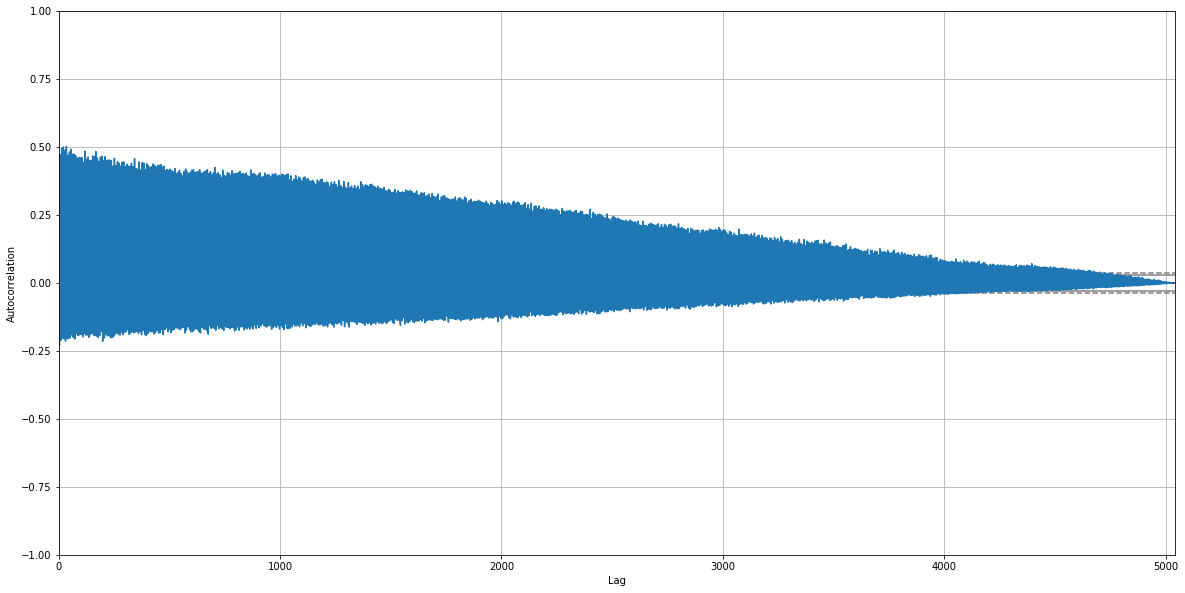

In [42]:
plt.figure(figsize=(20,10))
autocorrelation_plot(ar['Volume_percentage'])

In [ ]:
!pip install statsmodels

In [43]:
from statsmodels.tsa.ar_model import AR

In [81]:
import statsmodels.api as sm

In [82]:
X = tsla_new[["Perc_shift_1", "Perc_shift_2", "Perc_shift_3", "Perc_shift_4", "Perc_shift_5", "Perc_shift_6", "Perc_shift_7",
         "Hour2", "Hour3", "Hour4", "Hour5", "Hour6", "Hour7"]]
y = tsla_new["Volume_percentage"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Volume_percentage   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     1226.
Date:                Fri, 17 May 2019   Prob (F-statistic):               0.00
Time:                        00:06:38   Log-Likelihood:                 5251.7
No. Observations:                5041   AIC:                        -1.048e+04
Df Residuals:                    5028   BIC:                        -1.039e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Perc_shift_1     0.3566      0.016     22.347      0.000       0.325       0.388
Perc_shift_2     0.1844      0.017     11.153      0.000       0.152       0.217
Perc_shift_3     0.0759      0.017      4.544      0.000       0.043       0.109
Perc_shift_4     0.1079      0.017      6.464      0.000       0.075       0.141
Perc_shift_5     0.0646      0.017      3.884      0.000       0.032       0.097
Perc_shift_6     0.0629      0.016      3.839      0.000       0.031       0.095
Perc_shift_7     0.5093      0.012     41.086      0.000       0.485       0.534
Hour2           -0.0845      0.005    -15.400      0.000      -0.095      -0.074
Hour3           -0.0856      0.006    -15.073      0.000      -0.097      -0.074
Hour4           -0.0734      0.006    -12.566      0.000      -0.085      -0.062
Hour5           -0.0688      0.006    -11.734      0.000      -0.080      -0.057
Hour6           -0.0545      0.006     -9.458      0.000      -0.066      -0.043
Hour7           -0.0477      0.006     -8.548      0.000      -0.059      -0.037
==============================================================================
Omnibus:                     2975.525   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           108472.822
Skew:                           2.224   Prob(JB):                         0.00
Kurtosis:                      25.286   Cond. No.                         8.29
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

y1 = tsla["Percentage_Volume"]

ax.plot(y1, color = 'cornflowerblue')


plt.show()